<a href="https://colab.research.google.com/github/ampereapescador/MetodosI_AnaPerea_JuanGomez/blob/main/Parcial3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product
from scipy.optimize import minimize
from scipy.optimize import curve_fit

!pip install emcee
!pip install corner

import emcee

#Codigo desarrollado con ayuda de chat GPT, Gemini y Copilot

**Procesos de Markov**

Problema 2 (Cadena de producción)

Problema 3 (Cadena de producción con devolución de producto)

In [2]:
#Problema 2

estados = ["Producción", "Empaque", "Mercado"]

P = np.array([
    [0.10, 0.90, 0.00],
    [0.00, 0.05, 0.95],
    [0.00, 0.00, 1.00]
])

def estado_estable(matriz):
    n = matriz.shape[0]
    A = np.append(matriz.T - np.eye(n), [np.ones(n)], axis=0)
    b = np.append(np.zeros(n), [1])
    return np.linalg.lstsq(A, b, rcond=None)[0]

pi_estable = estado_estable(P)

prob_dos_ocupadas = pi_estable[0] + pi_estable[1]

prob_una_ocupada = 1 - pi_estable[2]

prob_produccion_vacia = 1 - pi_estable[0]

print("Estados estables (π):", pi_estable)
print("Probabilidad de ambas estaciones ocupadas:", prob_dos_ocupadas)
print("Probabilidad de al menos una estación ocupada:", prob_una_ocupada)
print("Probabilidad de Producción vacía:", prob_produccion_vacia)





Estados estables (π): [ 1.59731365e-16 -1.11022302e-16  1.00000000e+00]
Probabilidad de ambas estaciones ocupadas: 4.8709062599485396e-17
Probabilidad de al menos una estación ocupada: 0.0
Probabilidad de Producción vacía: 0.9999999999999999


In [26]:
#Problema 3

estados = ["Producción", "Empaque", "Mercado"]

P = np.array([
    [0.12, 0.88, 0.00],
    [0.00, 0.05, 0.95],
    [0.02, 0.00, 0.98]
])

def estado_estable(matriz):
    n = matriz.shape[0]

    A = np.append(matriz.T - np.eye(n), [np.ones(n)], axis=0)
    b = np.append(np.zeros(n), [1])
    return np.linalg.lstsq(A, b, rcond=None)[0]


pi_estable = estado_estable(P)

prob_dos_ocupadas = pi_estable[0] + pi_estable[1]  # P(S1 ∪ S2)
prob_una_ocupada = 1 - pi_estable[2]               # P(S1 ∩ S2)
prob_produccion_vacia = 1 - pi_estable[0]          # P(¬S1)

#DATOS
P_interseccion = 0.00043  # P(S1 ∩ S2) dado
P_union = prob_dos_ocupadas  # P(S1 ∪ S2) ya calculado
P_complemento_S1 = prob_produccion_vacia  # P(¬S1) ya calculado

#Impresion
print("Estados estables (π):", pi_estable)
print("Probabilidad de ambas estaciones ocupadas (P(S1 ∩ S2)):", P_interseccion)
print("Probabilidad de al menos una estación ocupada (P(S1 ∪ S2)):", P_union)
print("Probabilidad de Producción vacía (P(¬S1)):", P_complemento_S1)


Estados estables (π): [0.02177401 0.02016961 0.95805638]
Probabilidad de ambas estaciones ocupadas (P(S1 ∩ S2)): 0.00043
Probabilidad de al menos una estación ocupada (P(S1 ∪ S2)): 0.041943616777447415
Probabilidad de Producción vacía (P(¬S1)): 0.978225991290396


**Hidden Markov Models**

Problema 1: Casino tramposo

Secuencia más probable de estados: ['J', 'J', 'J', 'J', 'J', 'J', 'J', 'J']
Probabilidad de la secuencia: 0.0009555148800000006

Conjunto de secuencias más probables (20% de probabilidad acumulada):
                    Secuencia  Probabilidad  Probabilidad acumulada
0    (0, 0, 0, 0, 0, 0, 0, 0)  9.555149e-04                0.000956
1    (0, 0, 0, 0, 0, 0, 0, 1)  2.388787e-04                0.001194
240  (1, 1, 1, 1, 0, 0, 0, 0)  1.061683e-04                0.002531
224  (1, 1, 1, 0, 0, 0, 0, 0)  1.061683e-04                0.002380
192  (1, 1, 0, 0, 0, 0, 0, 0)  1.061683e-04                0.002218
..                        ...           ...                     ...
74   (0, 1, 0, 0, 1, 0, 1, 0)  2.880000e-09                0.001733
90   (0, 1, 0, 1, 1, 0, 1, 0)  2.880000e-09                0.001739
106  (0, 1, 1, 0, 1, 0, 1, 0)  2.880000e-09                0.001824
171  (1, 0, 1, 0, 1, 0, 1, 1)  1.280000e-09                0.002100
170  (1, 0, 1, 0, 1, 0, 1, 0)  3.200000e-10          

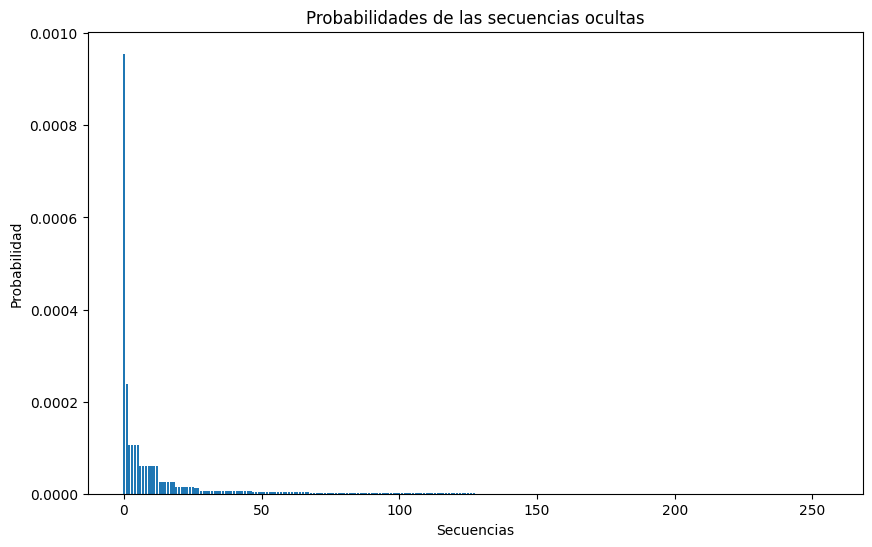

In [6]:
#Casino

T = np.array([[0.8, 0.2],
              [0.2, 0.8]])

E = np.array([[0.5, 0.9],
              [0.5, 0.1]])

pi = np.array([0.2, 0.8])

observaciones = ['S', 'C', 'C', 'C', 'S', 'C', 'S', 'C']
obs_map = {'C': 0, 'S': 1}
O = [obs_map[o] for o in observaciones]

def viterbi(pi, T, E, O):
    n_states = T.shape[0]
    n_obs = len(O)

    score = np.zeros((n_states, n_obs))
    path = np.zeros((n_states, n_obs), dtype=int)

    score[:, 0] = pi * E[:, O[0]]

    for t in range(1, n_obs):
        for j in range(n_states):
            prob = score[:, t - 1] * T[:, j] * E[j, O[t]]
            path[j, t] = np.argmax(prob)
            score[j, t] = np.max(prob)

    seq = np.zeros(n_obs, dtype=int)
    seq[-1] = np.argmax(score[:, -1])
    for t in range(n_obs - 2, -1, -1):
        seq[t] = path[seq[t + 1], t + 1]

    prob = np.max(score[:, -1])
    return seq, prob

seq_indices, prob = viterbi(pi, T, E, O)
estado_map = {0: 'J', 1: 'B'}
seq_estados = [estado_map[s] for s in seq_indices]

print("Secuencia más probable de estados:", seq_estados)
print("Probabilidad de la secuencia:", prob)


n_obs = len(O)
n_states = T.shape[0]
secuencias = list(product(range(n_states), repeat=n_obs))

def calcular_probabilidad(pi, T, E, O, secuencia):
    prob = pi[secuencia[0]] * E[secuencia[0], O[0]]
    for t in range(1, len(O)):
        prob *= T[secuencia[t - 1], secuencia[t]] * E[secuencia[t], O[t]]
    return prob

resultados = []
for sec in secuencias:
    prob = calcular_probabilidad(pi, T, E, O, sec)
    resultados.append((sec, prob))

df = pd.DataFrame(resultados, columns=["Secuencia", "Probabilidad"])
df['Probabilidad acumulada'] = df['Probabilidad'].cumsum()
df = df.sort_values(by="Probabilidad", ascending=False)

umbral = 0.2
df_filtrado = df[df['Probabilidad acumulada'] <= umbral]

print("\nConjunto de secuencias más probables (20% de probabilidad acumulada):")
print(df_filtrado)



plt.figure(figsize=(10, 6))
plt.bar(range(len(df['Probabilidad'])), df['Probabilidad'])
plt.xlabel("Secuencias")
plt.ylabel("Probabilidad")
plt.title("Probabilidades de las secuencias ocultas")
plt.show()

In [7]:
T = np.array([[0.8, 0.2], [0.2, 0.8]])
E = np.array([[0.5, 0.9], [0.5, 0.1]])
pi = np.array([0.2, 0.8])

observaciones = ["S", "C", "C", "C", "S", "C", "S", "C"]

obs_map = {"C": 0, "S": 1}
obs_seq = [obs_map[obs] for obs in observaciones]

def viterbi(T, E, pi, obs_seq):
    n_obs = len(obs_seq)
    n_states = T.shape[0]

    dp = np.zeros((n_states, n_obs))
    trace = np.zeros((n_states, n_obs), dtype=int)

    dp[:, 0] = pi * E[:, obs_seq[0]]

    for t in range(1, n_obs):
        for s in range(n_states):
            prob = dp[:, t-1] * T[:, s] * E[s, obs_seq[t]]
            dp[s, t] = np.max(prob)
            trace[s, t] = np.argmax(prob)

    seq = np.zeros(n_obs, dtype=int)
    seq[-1] = np.argmax(dp[:, -1])
    for t in range(n_obs - 2, -1, -1):
        seq[t] = trace[seq[t+1], t+1]

    prob_max = np.max(dp[:, -1])
    return seq, prob_max

hidden_seq, max_prob = viterbi(T, E, pi, obs_seq)

state_map = {0: "J", 1: "B"}
hidden_seq_names = [state_map[state] for state in hidden_seq]

result_df = pd.DataFrame({
    "Lanzamiento": range(1, len(obs_seq) + 1),
    "Observado": observaciones,
    "Estado Oculto": hidden_seq_names
})

print("Secuencia oculta más probable y su probabilidad:")
print(result_df)
print(f"Probabilidad de la secuencia más probable: {max_prob}")

def calculate_all_sequences(T, E, pi, obs_seq):
    n_obs = len(obs_seq)
    n_states = T.shape[0]

    all_seqs = []
    for seq in np.ndindex(*(n_states,) * n_obs):
        prob = pi[seq[0]] * E[seq[0], obs_seq[0]]
        for t in range(1, n_obs):
            prob *= T[seq[t-1], seq[t]] * E[seq[t], obs_seq[t]]
        all_seqs.append((seq, prob))

    all_seqs = sorted(all_seqs, key=lambda x: x[1], reverse=True)

    total_prob = sum(p for _, p in all_seqs)
    cumulative_prob = 0
    result = []
    for seq, prob in all_seqs:
        cumulative_prob += prob / total_prob
        result.append((seq, prob, cumulative_prob))
        if cumulative_prob >= 0.2:
            break

    df = pd.DataFrame(result, columns=["Secuencia", "Probabilidad", "Probabilidad Acumulada"])
    return df

Secuencia oculta más probable y su probabilidad:
   Lanzamiento Observado Estado Oculto
0            1         S             J
1            2         C             J
2            3         C             J
3            4         C             J
4            5         S             J
5            6         C             J
6            7         S             J
7            8         C             J
Probabilidad de la secuencia más probable: 0.0009555148800000006


**Ejercicios estimación de parámetros**

Problema 9: Estimación de la temperatura de un gas diatómico

Problema 10: Higgs boson discovery

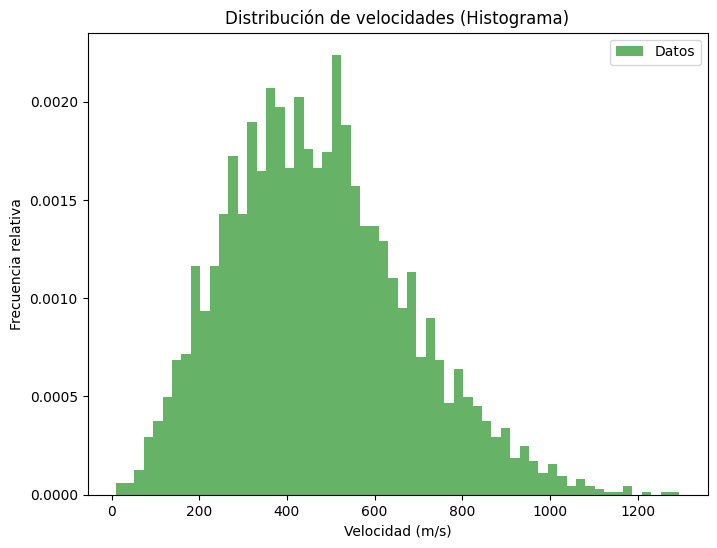

In [32]:
#Problema 9 Maxwell-Boltzmann distribution

#(a) Descargue los datos de velocidad:
# Constantes
M = 0.028
R = 8.31
kB = R / (6.022e23)

# Descarga y carga de datos
url = "https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Maxwell.csv"
data = pd.read_csv(url)
velocidades = data['Velocidad'].values

#(b) Construya el histograma de frecuencia relativa
n_bins = 60
hist, bins = np.histogram(velocidades, bins=n_bins, density=True)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

#Imprimir histograma
plt.figure(figsize=(8, 6))
plt.hist(velocidades, bins=n_bins, density=True, alpha=0.6, color='g', label="Datos")
plt.xlabel("Velocidad (m/s)")
plt.ylabel("Frecuencia relativa")
plt.title("Distribución de velocidades (Histograma)")
plt.legend()
plt.show()




In [33]:
#(c) Calcule el valor promedio emp´ırico de la velocidad de las mol´eculas de nitr´ogeno
velocidad_promedio_empirica = np.sum(hist * bin_centers * np.diff(bins))
print(f"Velocidad promedio empírica: {velocidad_promedio_empirica:.2f} m/s")


Velocidad promedio empírica: 472.15 m/s


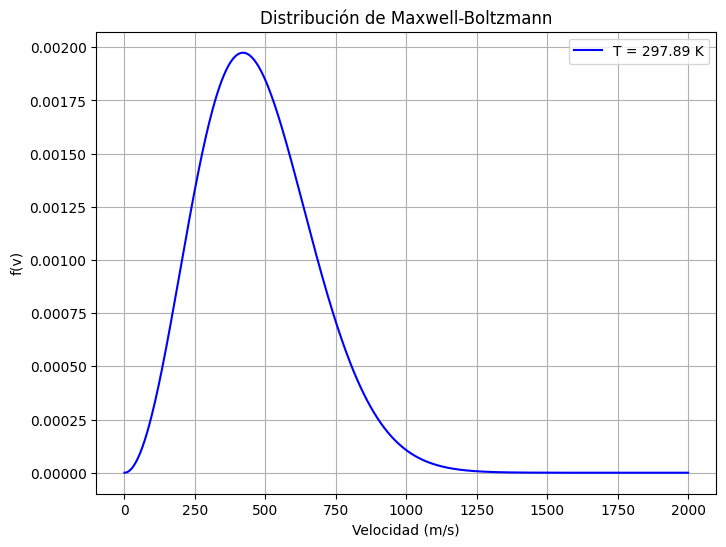

In [52]:
#(d) Defina la funci´on de Likelihood

def maxwell_boltzmann_likelihood(v, T):
    # Constantes
    M = 0.028
    kB = 1.38e-23
    R = 8.31

    m = M / (6.022e23)  # Masa de una molécula (kg)

    # Calcular el prefactor y la distribución
    prefactor = (m / (2 * np.pi * kB * T)) ** 1.5
    distribution = prefactor * 4 * np.pi * v**2 * np.exp(-m * v**2 / (2 * kB * T))
    return distribution

velocidades = np.linspace(0, 2000, 500)
T = 297.89

# Calcular la distribución
f_v = maxwell_boltzmann_likelihood(velocidades, T)

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(velocidades, f_v, label=f"T = {T} K", color='blue')
plt.title("Distribución de Maxwell-Boltzmann")
plt.xlabel("Velocidad (m/s)")
plt.ylabel("f(v)")
plt.grid()
plt.legend()
plt.show()



Temperatura ajustada: 295.91 K


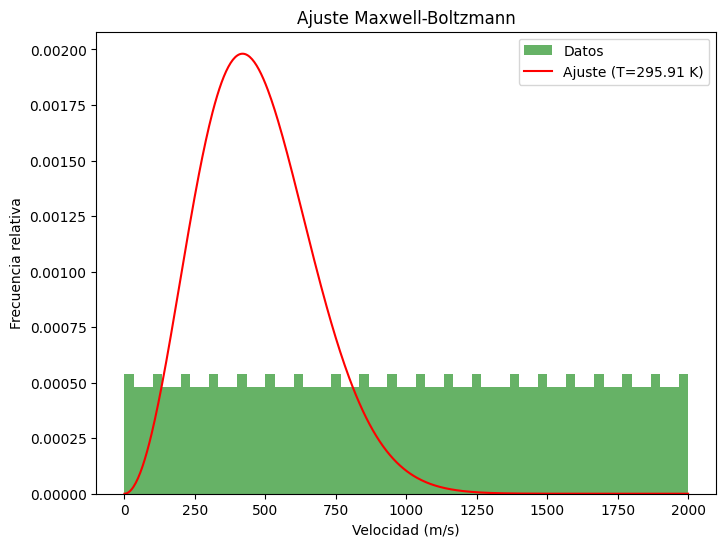

In [36]:
#(e) Utilice alg´un algoritmo de optimizaci´on para encontrar el mejor ajuste a los datos

# Ajuste de temperatura
popt, _ = curve_fit(maxwell_boltzmann_likelihood, bin_centers, hist, p0=[300])  # Inicialmente asumimos T=300 K
T_fit = popt[0]
print(f"Temperatura ajustada: {T_fit:.2f} K")

# Graficar histograma con ajuste
plt.figure(figsize=(8, 6))
plt.hist(velocidades, bins=n_bins, density=True, alpha=0.6, color='g', label="Datos")
v_fit = np.linspace(min(velocidades), max(velocidades), 500)
plt.plot(v_fit, maxwell_boltzmann_likelihood(v_fit, T_fit), 'r-', label=f"Ajuste (T={T_fit:.2f} K)")
plt.xlabel("Velocidad (m/s)")
plt.ylabel("Frecuencia relativa")
plt.title("Ajuste Maxwell-Boltzmann")
plt.legend()
plt.show()


In [40]:
#(f) Calcule la velocidad m´as probable
v_p = np.sqrt(2 * R * T_fit / M)
print(f"Velocidad más probable: {v_p:.2f} m/s")

#(g) Calcule la velocidad promedio
v_m = np.sqrt(2 / np.pi) * v_p
print(f"Velocidad promedio teórica: {v_m:.2f} m/s")

# (h) Calcule la velocidad cuadr´atica media:
v_rms = np.sqrt(3 * R * T_fit / M)
print(f"Velocidad cuadrática media: {v_rms:.2f} m/s")

Velocidad más probable: 419.10 m/s
Velocidad promedio teórica: 334.39 m/s
Velocidad cuadrática media: 513.29 m/s


In [42]:

#(i) Utilice el algoritmo de Metr´opolis-Hastings para encontrar la funci´on de distribuci´on posterior de este problema. C´ual es el error est´andar asociado a la estimaci´on?

def log_likelihood(T, v_data):
    model =maxwell_boltzmann_likelihood(v_data, T)
    return np.sum(np.log(model))

# Prior uniforme para T
def log_prior(T):
    if 0 < T < 1000:  # Temperatura físicamente plausible
        return 0
    return -np.inf

# Posterior como combinación
def log_posterior(T, v_data):
    return log_prior(T) + log_likelihood(T, v_data)

# Configuración de Metropolis-Hastings
ndim = 1  # Solo una variable: T
nwalkers = 50
nsteps = 1000

initial_guess = T_fit + 0.1 * np.random.randn(nwalkers, ndim)
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(velocidades,))
sampler.run_mcmc(initial_guess, nsteps, progress=True)

# Extraer muestras
samples = sampler.get_chain(flat=True)
T_est = np.mean(samples)
T_std = np.std(samples)
print(f"Temperatura estimada: {T_est:.2f} ± {T_std:.2f} K")


#(j) Qu´e modelos de temperatura superiores a Tˆ est´an excluidos dada la observaci´on?
T_upper_limit = T_est + 1.96 * T_std  # 95% IC
print(f"Temperatura superior excluida (>305.6 K): {T_upper_limit > 305.6}")

<ipython-input-42-2290704b0f9a>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(model))
100%|██████████| 1000/1000 [00:05<00:00, 170.80it/s]

Temperatura estimada: 295.89 ± 0.10 K
Temperatura superior excluida (>305.6 K): False


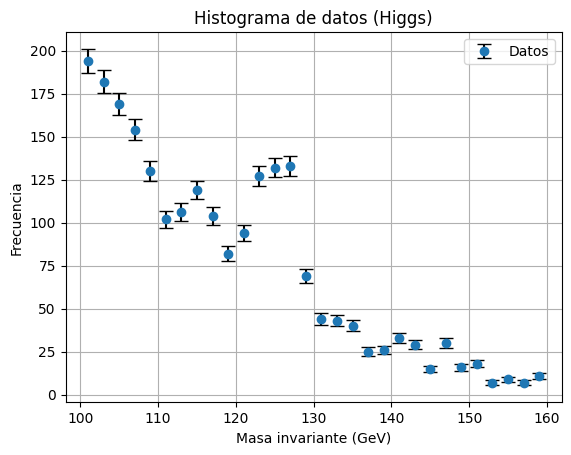

In [12]:
#Problema 10

data = np.genfromtxt('HiggsFitting.csv', delimiter='.',skip_header=1)
Masas = pd.DataFrame()
Masas['masas'] = data[:,0]

bins = np.linspace(100, 160, 31)
hist, bin_edges = np.histogram(data, bins=bins)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

errors = np.sqrt(hist)
plt.errorbar(bin_centers, hist, yerr=0.5*errors, fmt='o', ecolor='k', capsize=5, label='Datos')
plt.xlabel("Masa invariante (GeV)")
plt.ylabel("Frecuencia")
plt.title("Histograma de datos (Higgs)")
plt.legend()
plt.grid()
plt.show()


In [13]:
def likelihood_null(alpha, x):
    if alpha <= 0:
        return np.inf
    return -np.sum(np.log((1 / alpha) * np.exp(-(x - 100) / alpha)))

# Filtrar los datos para la región de ajuste (100-160 GeV)
data_filtered = data[(data >= 100) & (data <= 160)]

# Optimización para encontrar el mejor parámetro alpha
result_null = minimize(likelihood_null, x0=10, args=(data_filtered,), bounds=[(0.1, 50)])
alpha_opt = result_null.x[0]

print(f"Parámetro optimizado para la hipótesis nula (alpha): {alpha_opt:.2f}")


Parámetro optimizado para la hipótesis nula (alpha): 17.12


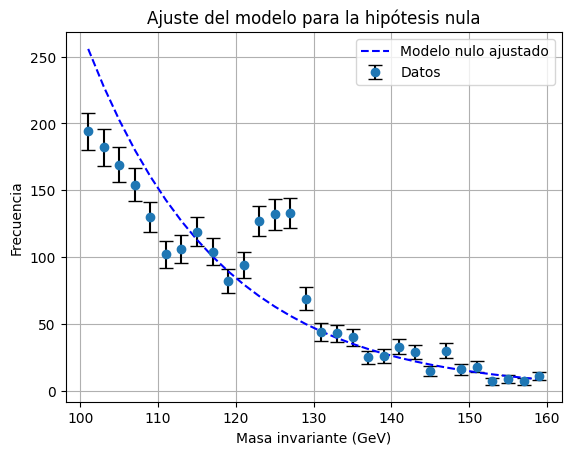

In [14]:
# Graficar el modelo ajustado para la hipótesis nula
model_null = (1 / alpha_opt) * np.exp(-(bin_centers - 100) / alpha_opt)

plt.errorbar(bin_centers, hist, yerr=errors, fmt='o', ecolor='k', capsize=5, label='Datos')
plt.plot(bin_centers, model_null * np.sum(hist) / np.sum(model_null), 'b--', label='Modelo nulo ajustado')
plt.xlabel("Masa invariante (GeV)")
plt.ylabel("Frecuencia")
plt.title("Ajuste del modelo para la hipótesis nula")
plt.legend()
plt.grid()
plt.show()

In [15]:
# Redefinir la función de verosimilitud para el modelo alternativo
def likelihood_alternative(params, x):
    """Función de verosimilitud para la hipótesis alternativa."""
    A, mu, sigma, alpha = params
    if not (0 < A < 1 and sigma > 0 and alpha > 0):
        return np.inf  # Penalizar valores no válidos
    signal = A * (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
    background = (1 - A) * (1 / alpha) * np.exp(-(x - 100) / alpha)
    likelihood = signal + background
    likelihood[likelihood <= 0] = 1e-10

    return -np.sum(np.log(likelihood))

# Asegurarnos de que no se produzcan valores NaN ajustando las restricciones
num_samples = 10000

# Generar muestras aleatorias dentro de los límites definidos
A_samples = np.random.uniform(0, 1, num_samples)
mu_samples = np.random.uniform(120, 130, num_samples)
sigma_samples = np.random.uniform(0.1, 10, num_samples)
alpha_samples = np.random.uniform(1, 50, num_samples)

# Evaluar la verosimilitud para cada muestra y manejar posibles valores inválidos
likelihoods = []
for A, mu, sigma, alpha in zip(A_samples, mu_samples, sigma_samples, alpha_samples):
    try:
        likelihood = -likelihood_alternative([A, mu, sigma, alpha], data)
        likelihoods.append(likelihood)
    except:
        likelihoods.append(-np.inf)

likelihoods = np.array(likelihoods)

# Filtrar las mejores muestras basadas en la verosimilitud
threshold = np.percentile(likelihoods[np.isfinite(likelihoods)], 95)
best_samples_mask = likelihoods >= threshold

best_A_samples = A_samples[best_samples_mask]
best_mu_samples = mu_samples[best_samples_mask]
best_sigma_samples = sigma_samples[best_samples_mask]
best_alpha_samples = alpha_samples[best_samples_mask]

# Calcular las estadísticas de las mejores muestras
A_opt, A_std = np.mean(best_A_samples), np.std(best_A_samples)
mu_opt, mu_std = np.mean(best_mu_samples), np.std(best_mu_samples)
sigma_opt, sigma_std = np.mean(best_sigma_samples), np.std(best_sigma_samples)
alpha_opt_alt, alpha_std = np.mean(best_alpha_samples), np.std(best_alpha_samples)

# Mostrar los resultados de los parámetros y sus errores
print(f"Parámetros óptimos y errores estimados:")
print(f"A: {A_opt:.4f} ± {A_std:.4f}")
print(f"μ: {mu_opt:.4f} ± {mu_std:.4f}")
print(f"σ: {sigma_opt:.4f} ± {sigma_std:.4f}")
print(f"α: {alpha_opt_alt:.4f} ± {alpha_std:.4f}")

Parámetros óptimos y errores estimados:
A: 0.2147 ± 0.1206
μ: 124.7211 ± 2.5825
σ: 6.5354 ± 2.4031


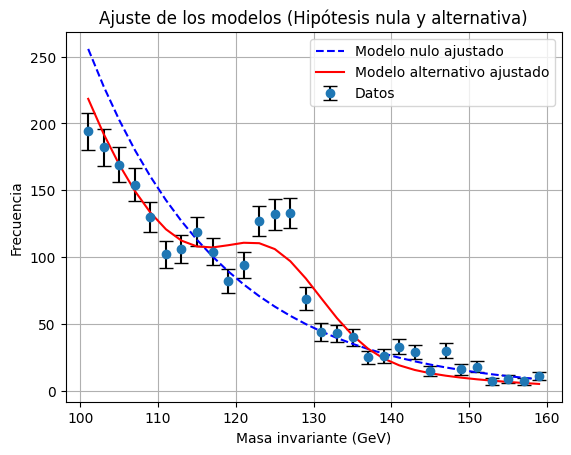

In [16]:

# Graficar el modelo ajustado para la hipótesis alternativa
signal_alt = A_opt * (1 / (np.sqrt(2 * np.pi) * sigma_opt)) * np.exp(
    -0.5 * ((bin_centers - mu_opt) / sigma_opt) ** 2
)
background_alt = (1 - A_opt) * (1 / alpha_opt_alt) * np.exp(-(bin_centers - 100) / alpha_opt_alt)
model_alt = signal_alt + background_alt

model_alt_scaled = model_alt * np.sum(hist) / np.sum(model_alt)

plt.errorbar(bin_centers, hist, yerr=errors, fmt='o', ecolor='k', capsize=5, label='Datos')
plt.plot(bin_centers, model_null * np.sum(hist) / np.sum(model_null), 'b--', label='Modelo nulo ajustado')
plt.plot(bin_centers, model_alt_scaled, 'r-', label='Modelo alternativo ajustado')
plt.xlabel("Masa invariante (GeV)")
plt.ylabel("Frecuencia")
plt.title("Ajuste de los modelos (Hipótesis nula y alternativa)")
plt.legend()
plt.grid()
plt.show()

In [25]:
# Punto (l): Cálculo del número de desviaciones estándar (nσ)
Null = likelihood_null(alpha_opt,Masas['masas'])
Alt = likelihood_alternative([A_opt,mu_opt,sigma_opt, alpha_opt_alt], Masas['masas'])
n_sigma = np.sqrt(-2 * (Alt - Null))

print(f"Desviacion estandar:{n_sigma}")

Desviacion estandar:13.901271304481364


In [18]:

hbar = 1.015e-23

sigma_joules = sigma_opt * 1.60218e-10

tau = hbar / sigma_joules

print(f"Tiempo de vida de la partícula (τ): {tau:.4e} s")

Tiempo de vida de la partícula (τ): 9.6936e-15 s


100%|██████████| 1000/1000 [00:11<00:00, 84.30it/s]


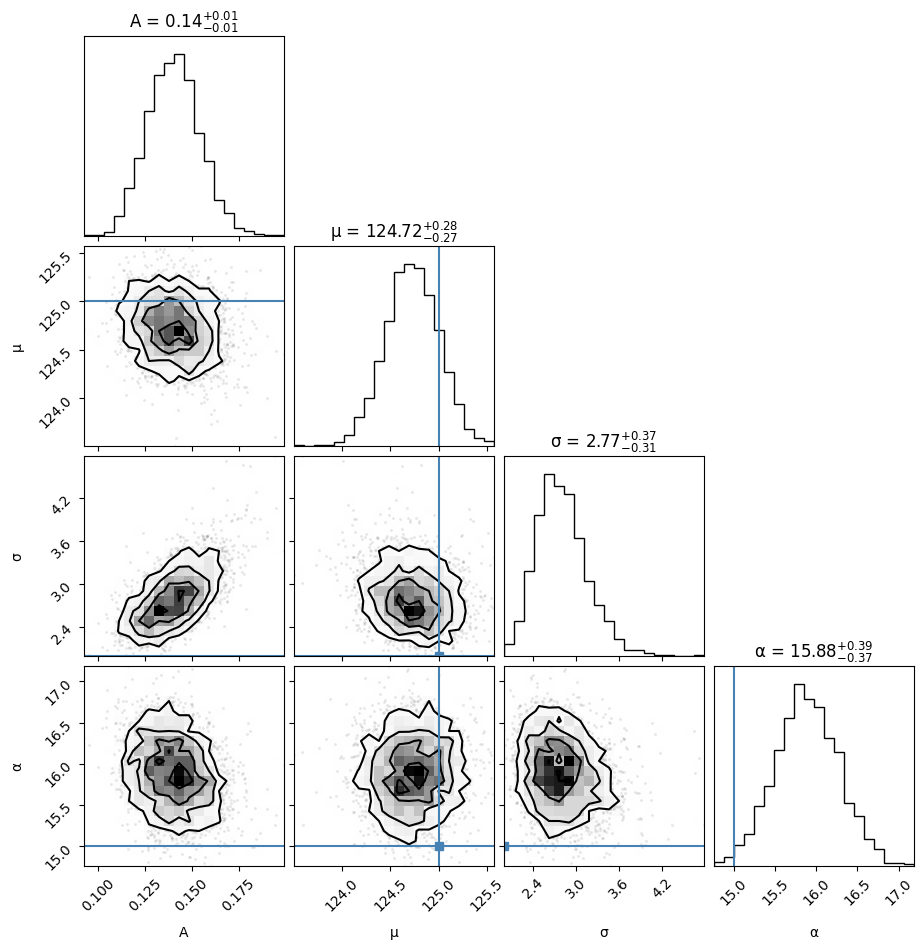

In [21]:
def log_prior(p):
        A, mu, sigma, alpha = p
        if 0 < A < 1 and 100 <= mu <= 300 and 0.1 <= sigma <= 20 and 1 <= alpha <= 50:
            return 0.0
        return -np.inf

def log_probability(p, x):
        lp = log_prior(p)
        if not np.isfinite(lp):
            return -np.inf
        return lp - likelihood_alternative(p, x)

n_walkers = 32
n_dim = 4
n_steps = 1000

initial_guess = [0.3, 125, 2, 15]
initial_positions = [
        initial_guess + 1e-4 * np.random.randn(n_dim) for _ in range(n_walkers)
    ]

sampler = emcee.EnsembleSampler(n_walkers, n_dim, log_probability, args=(data,))
sampler.run_mcmc(initial_positions, n_steps, progress=True)

samples = sampler.get_chain(discard=200, thin=10, flat=True)

import corner

fig = corner.corner(
        samples,
        labels=["A", "μ", "σ", "α"],
        truths=[0.3, 125, 2, 15],
        show_titles=True,
    )
plt.show()


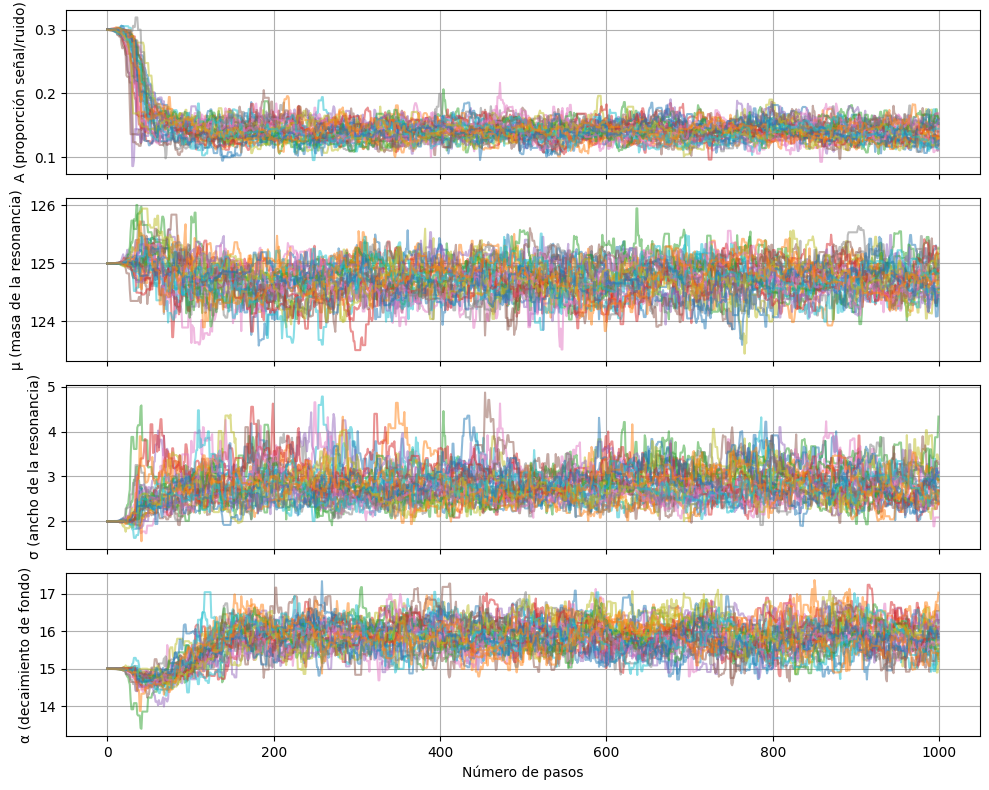

In [22]:

fig, axes = plt.subplots(4, figsize=(10, 8), sharex=True)
labels = ["A (proporción señal/ruido)", "μ (masa de la resonancia)", "σ (ancho de la resonancia)", "α (decaimiento de fondo)"]

for i in range(4):
    axes[i].plot(sampler.get_chain()[:, :, i], alpha=0.5)
    axes[i].set_ylabel(labels[i])
    axes[i].grid()

axes[-1].set_xlabel("Número de pasos")
plt.tight_layout()
plt.show()

In [23]:

mu_error_percentage = (mu_std / mu_opt) * 100
print(f"Error porcentual en la estimación de la masa (μ): {mu_error_percentage:.2f}%")

Error porcentual en la estimación de la masa (μ): 2.07%


**Ejercicios: Hypothesis testing**

Problema 4: Tiempo de escape de un fotón del so

Pasos promedio: 104.53
Clases: [ 16.    38.25  60.5   82.75 105.   127.25 149.5  171.75 194.   216.25
 238.5  260.75 283.   305.25 327.5  349.75 372.   394.25 416.5  438.75
 461.  ]
Frecuencias relativas normalizadas: [0.074 0.199 0.193 0.146 0.115 0.079 0.061 0.039 0.027 0.021 0.016 0.01
 0.004 0.004 0.002 0.004 0.004 0.    0.001 0.001]


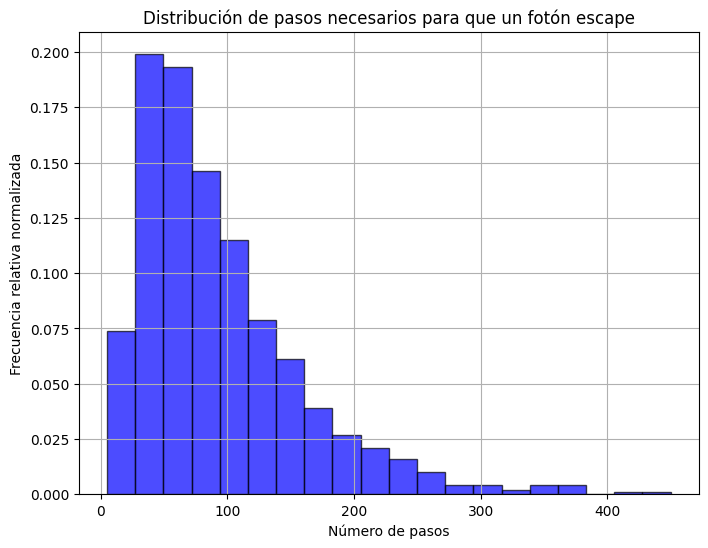

In [47]:
#Problema 4 Tiempo de escape de un foton del sol

#(a) Genere N = 1000 fotones aleatorios y retorne cu´antos pasos le toma salir al fot´on
def simular_fotones(N, l, Rs):
    pasos_por_foton = []

    for _ in range(N):
        x, y, z = 0, 0, 0
        pasos = 0
        while np.sqrt(x**2 + y**2 + z**2) < Rs:
            theta = np.random.uniform(0, np.pi)
            phi = np.random.uniform(0, 2 * np.pi)
            x += l * np.sin(theta) * np.cos(phi)
            y += l * np.sin(theta) * np.sin(phi)
            z += l * np.cos(theta)
            pasos += 1
        pasos_por_foton.append(pasos)

    return np.array(pasos_por_foton)

N = 1000
l = 0.1
Rs = 1
pasos = simular_fotones(N, l, Rs)
print(f"Pasos promedio: {np.mean(pasos)}")

#(b) Elija una distribuci´on de clases que tenga su valor m´ınimo y su m´aximo

min_pasos = pasos.min()
max_pasos = pasos.max()

n_clases = 20
bins = np.linspace(min_pasos, max_pasos, n_clases + 1)
print("Clases:", bins)

#(c) Construya la distribuci´on de frecuencias y normalice correctamente a la unidad.
histograma, edges = np.histogram(pasos, bins=bins, density=True)

# Normalización
frecuencias_relativas = histograma / histograma.sum()
print("Frecuencias relativas normalizadas:", frecuencias_relativas)


#(d) Dibuje la distribuci´on de frecuencias usando los m´etodos de clase.
plt.figure(figsize=(8, 6))
plt.bar(edges[:-1], frecuencias_relativas, width=np.diff(edges), alpha=0.7, color='blue', edgecolor='black')
plt.title("Distribución de pasos necesarios para que un fotón escape")
plt.xlabel("Número de pasos")
plt.ylabel("Frecuencia relativa normalizada")
plt.grid()
plt.show()


In [53]:
#(e) Calcule el valor esperado del n´umero de pasos que le toma al fot´on escapar
# Marcas de clase
marcas_de_clase = (edges[:-1] + edges[1:]) / 2
E = np.sum(frecuencias_relativas * marcas_de_clase)
print(f"Valor esperado del número de pasos: {E}")

#(f) Verifique que el n´umero medio de pasos medio es aproximadamente:

teorico = (Rs / l) ** 2
print(f"Valor teórico del número de pasos: {teorico}")
print(f"Diferencia porcentual: {abs(teorico - E) / teorico * 100:.2f}%")

#(g) (Calculo realista:)
# Parámetros reales
Rs_real = 700000  # km
c = 300000        # km/s
l_real = 0.6 / 100000  # cm a km

# Tiempo medio de escape
T = (Rs_real**2) / (l_real * c)
T_anios = T / (60 * 60 * 24 * 365)  # Convertir a años
print(f"Tiempo medio de escape: {T_anios:.2f} años")




Valor esperado del número de pasos: 104.57725
Valor teórico del número de pasos: 100.0
Diferencia porcentual: 4.58%
Tiempo medio de escape: 8632.11 años


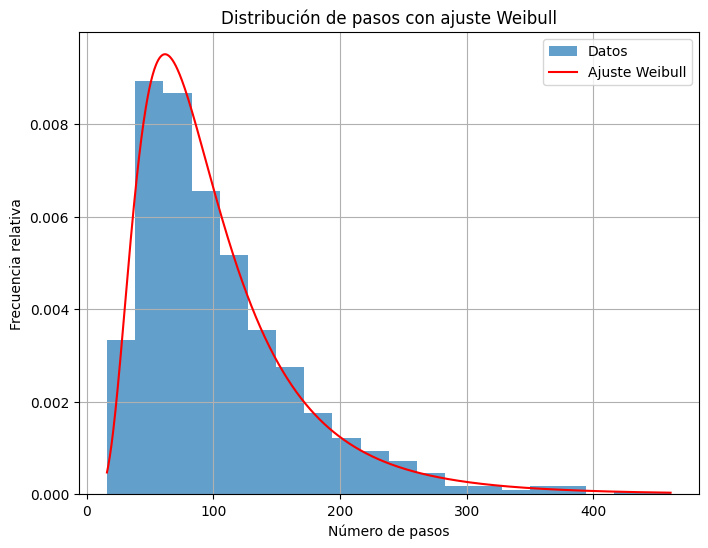

Parámetros ajustados: a=21.26383459260621, c=0.5676509501567971, loc=0, scale=9.884935594115596


In [48]:
#(h) Realice un ajuste al histograma usando una distribuci´on exponencial de Weibull:
from scipy.stats import exponweib

# Ajuste con Weibull exponencial
params = exponweib.fit(pasos, floc=0)  # Ajuste forzado para inicio en 0
a, c, loc, scale = params

# Distribución ajustada
x = np.linspace(min_pasos, max_pasos, 1000)
ajuste = exponweib.pdf(x, a, c, loc, scale)

# Graficar
plt.figure(figsize=(8, 6))
plt.hist(pasos, bins=bins, density=True, alpha=0.7, label="Datos")
plt.plot(x, ajuste, label="Ajuste Weibull", color="red")
plt.title("Distribución de pasos con ajuste Weibull")
plt.xlabel("Número de pasos")
plt.ylabel("Frecuencia relativa")
plt.legend()
plt.grid()
plt.show()

print(f"Parámetros ajustados: a={a}, c={c}, loc={loc}, scale={scale}")
